In [4]:
import numpy as np
import matplotlib.pyplot as plt

from abstract_udmis import AbstractUDMIS

In [9]:
class UDMIS(AbstractUDMIS):
    def __init__(self, u, graph):
        super().__init__()
        self.u, self.graph = u, graph
        self.num_vertices = len(self.graph)
        print(self.num_vertices)
        # initialize system at infinite temperature
        # i.e. vertices are completely random and uncorrelated
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()
    
    def find_edges(self):
        #num_pairs = int(self.num_vertices*(self.num_vertices)*0.5)
        edges = np.zeros((self.num_vertices, self.num_vertices), dtype=bool)
        
        for i in range(self.num_vertices-1):
            x_i, y_i = graph[i] # these are the x, y coordinates of the i'th vertex in the graph
            for j in range(i+1, self.num_vertices):
                x_j, y_j = graph[j] # these are the x, y coordinates of the j'th vertex in the graph
                
                # calculate the distance between vertices
                dij = np.sqrt((x_i - x_j)**2. + (y_i - y_j)**2.)
                if dij <= 1.0:
                    edges[i,j] = True
                    edges[j,i] = True
                    
        return edges
        
    def energy(self):
        """Returns the energy of the current spin configuration"""
        # interaction term
        interaction_term = 0
        vertex_term = 0
        for i in range(self.num_vertices-1):
            for j in range(i+1, self.num_vertices):
                
                # check if there is an edge
                if self.edges[i,j]:
                    interaction_term += self.occupations[i]*self.occupations[j]
                
            vertex_term += self.occupations[i]
        
        # missed the last vertex
        vertex_term += self.occupations[self.num_vertices-1]
    
        return u*interaction_term - vertex_term

    def energy_diff(self, i):
        connections = np.where(self.edges[i,:])[0]
        num_adjacent_occupied = sum(self.occupations[connections])
        
        if self.occupations[i] == 1:
            # flipping an occupied vertex increases the vertex term, decreases the interaction term
            vertex_term_change = 1.
            interaction_term_change = -u*num_adjacent_occupied
        
        elif self.occupations[i] == 0:
            # flipping an unoccupied vertex decreases the vertex term, increases the interaction term
            vertex_term_change = -1.
            interaction_term_change = u*num_adjacent_occupied 

        return interaction_term_change + vertex_term_change
    
    def rand_vertex(self):
        """Selects a site in the graph at random"""
        return np.random.randint(self.num_vertices)        
    
    def draw_graph(self):
        graph_np = np.array(self.graph)
        xs = graph_np[:,0]
        ys = graph_np[:,1]
        cs = self.occupations

        fig, ax = plt.subplots()
        
        # plot the non activated vertices in the background
        for x,y,c in zip(xs,ys,cs):
            if not(c):
                circle = plt.Circle((x,y),0.5,color = 'gray' ,alpha=0.5)
                ax.add_patch(circle)
                
        for x,y,c in zip(xs,ys,cs):
            if c:
                circle = plt.Circle((x,y),0.5,color = 'b',alpha=0.3)
                ax.add_patch(circle)
        
        ax.axis('equal')
        
        return fig,ax

In [10]:
u = 1.35
graph = [(1.19, 4.25),
        (2.71, 3.48),
        (1.19, 3.51),
        (2, 3.38),
        (1.12, 2.86),
        (1.70, 2.42),
        (2.36, 2.54),
        (1.52, 1.48),
        (2.15, 1.54),
        (2.14, 1.87),
        (1.72, 0.86),
        (2.29, 0.87)]

udmis = UDMIS(u, graph)

12


In [11]:
N = 5000
t = np.arange(N+1)
T_i = 100
T_f = 0.01

T = T_i * ((T_f/T_i) ** (t/N))

for t in range(N):
    # take a look at the abstract_udmis.py file to see how mc_step works
    temp = T[t]
    E = udmis.mc_step(T=temp)
    
#     if t % 100 == 0:
#         print(t, E, udmis.occupations)

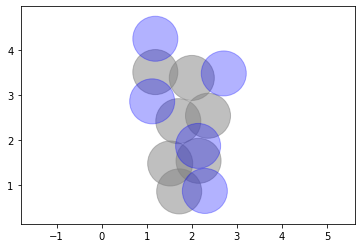

In [12]:
udmis.draw_graph();

In [13]:
N = 5000
t = np.arange(N+1)
T_i = 100
T_f = 0.01

T = T_i * ((T_f/T_i) ** (t/N))

for t in range(N):
    # take a look at the abstract_udmis.py file to see how mc_step works
    temp = T[t]
    E = udmis.mc_step(T=temp)
    
#     if t % 100 == 0:
#         print(t, E, udmis.occupations)

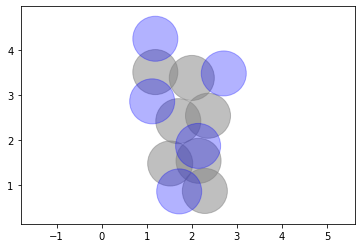

In [14]:
udmis.draw_graph();